### AES cryptosystem analysis.
#### Author: Vadym Tunik.

In [1]:
from AES import encrypt
import numpy as np
import matplotlib.pyplot as plt

# Example Vectors were taken from FIPS 197, Advanced Encryption Standard (AES): Appendix C
PLAINTEXT = bytearray.fromhex('00112233445566778899aabbccddeeff')
KEY_128 = bytearray.fromhex('000102030405060708090a0b0c0d0e0f')
KEY_192 = bytearray.fromhex('000102030405060708090a0b0c0d0e0f1011121314151617')
KEY_256 = bytearray.fromhex('000102030405060708090a0b0c0d0e0f101112131415161718191a1b1c1d1e1f')
KEY_LIST = [KEY_128, KEY_192, KEY_256]
AES_LIST = ['AES-128','AES-192','AES-256']

Let's find out the following for each of the AES-128, AES-192 and AES-256 cryptosystems:
1) how much on average (among 1000 random tests) does a bit of the cryptotext change when one bit of the PLAINTEXT changes;
2) how much on average (among 1000 random tests) does a bit of the cryptotext change when one bit of the KEY changes.

In [2]:
def convert_bytearray_to_bitstring(arr: bytearray) -> str:
    return ''.join(format(byte, '08b') for byte in arr)

def convert_bitstring_to_bytearray(s: str) -> bytearray:
    return bytearray(int(s[i:i+8], 2) for i in range(0, len(s), 8))

def replace_bit(bit_string: str) -> str:
    bit_array = np.array(list(bit_string), dtype=int)
    index = np.random.randint(0, len(bit_string))
    bit_array[index] = 1 - bit_array[index]
    new_bit_string = ''.join(map(str, bit_array))
    return new_bit_string

def count_changes(binary_string1: str, binary_string2: str) -> int:
    changes = 0
    for bit1, bit2 in zip(binary_string1, binary_string2):
        if bit1 != bit2:
            changes += 1
    return changes


1) how much on average (among 1000 random tests) does a bit of the cryptotext change when one bit of the PLAINTEXT changes.

Average changes for AES-128 = 63.592
Average changes for AES-192 = 64.301
Average changes for AES-256 = 65.465


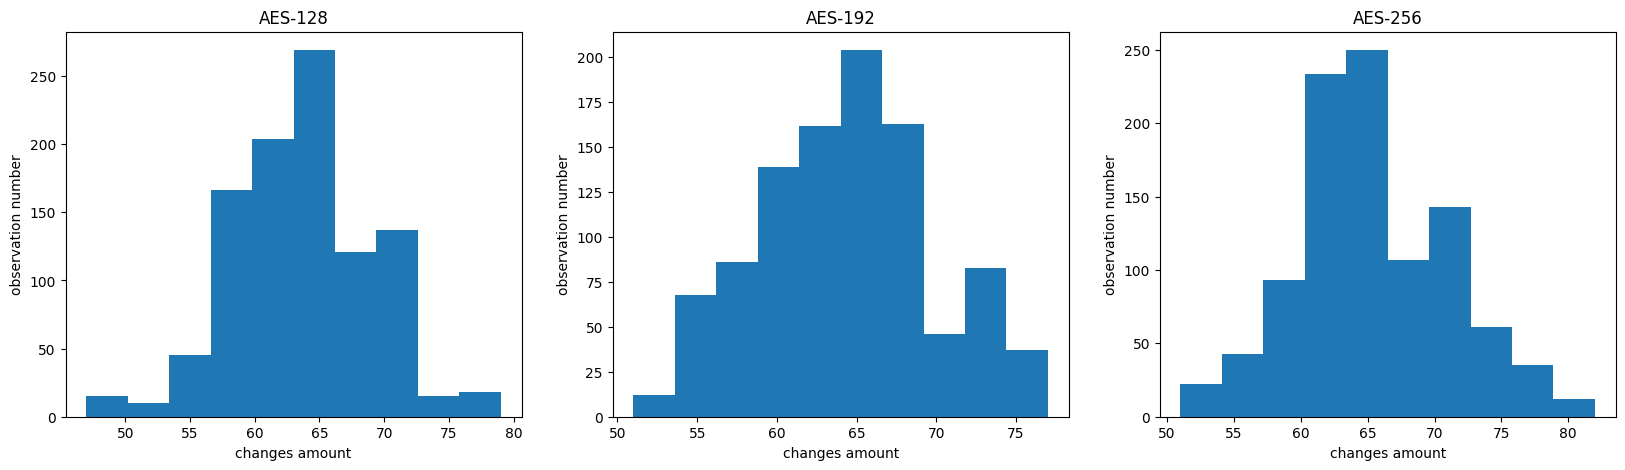

In [3]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
for i in range(3):
    KEY = KEY_LIST[i]
    history = []
    for _ in range(1000):
        PLAINTEXT_bitstring = convert_bytearray_to_bitstring(PLAINTEXT)
        PLAINTEXT_CNANGED_bitstring = replace_bit(PLAINTEXT_bitstring)
        PLAINTEXT_CNANGED = convert_bitstring_to_bytearray(PLAINTEXT_CNANGED_bitstring)

        cryptotext = encrypt(PLAINTEXT, KEY)
        cryptotext_changed = encrypt(PLAINTEXT_CNANGED, KEY) 

        cryptotext_bitstring = convert_bytearray_to_bitstring(cryptotext)
        cryptotext_changed_bitstring = convert_bytearray_to_bitstring(cryptotext_changed)

        changes_amount = count_changes(cryptotext_bitstring, cryptotext_changed_bitstring)
        history.append(changes_amount)

    ax[i].hist(history)
    ax[i].set_title(AES_LIST[i])
    ax[i].set_xlabel("changes amount")
    ax[i].set_ylabel("observation number")
    print(f'Average changes for {AES_LIST[i]} = {sum(history)/len(history)}')

2) how much on average (among 1000 random tests) does a bit of the cryptotext change when one bit of the KEY changes.

Average changes for AES-128 = 63.894
Average changes for AES-192 = 63.947
Average changes for AES-256 = 63.973


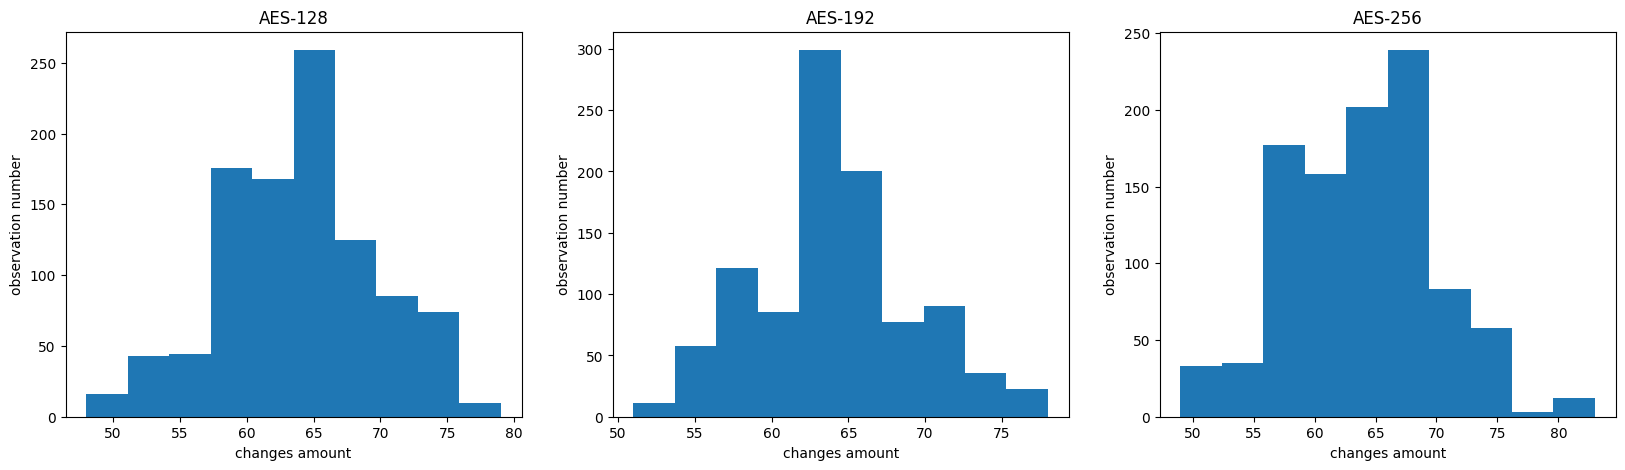

In [4]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
for i in range(3):
    KEY = KEY_LIST[i]
    history = []
    for _ in range(1000):
        KEY_bitstring = convert_bytearray_to_bitstring(KEY)
        KEY_CNANGED_bitstring = replace_bit(KEY_bitstring)
        KEY_CNANGED = convert_bitstring_to_bytearray(KEY_CNANGED_bitstring)

        cryptotext = encrypt(PLAINTEXT, KEY)
        cryptotext_changed = encrypt(PLAINTEXT, KEY_CNANGED) 

        cryptotext_bitstring = convert_bytearray_to_bitstring(cryptotext)
        cryptotext_changed_bitstring = convert_bytearray_to_bitstring(cryptotext_changed)

        changes_amount = count_changes(cryptotext_bitstring, cryptotext_changed_bitstring)
        history.append(changes_amount)

    ax[i].hist(history)
    ax[i].set_title(AES_LIST[i])
    ax[i].set_xlabel("changes amount")
    ax[i].set_ylabel("observation number")
    print(f'Average changes for {AES_LIST[i]} = {sum(history)/len(history)}')